### Clustering the shares based on Compounded Annual Growth rate and Volatility
In this project, we aim to cluster stocks based on their performance over the past year. We will focus on two key metrics: growth, which measures how much a stock has appreciated in value, and volatility, which measures the fluctuation in a stock's daily returns. Clustering stocks can help identify groups with similar investment characteristics

### Data Collection and Preparation:

**Data Source:** Collect historical stock data from Yahoo Finance or another reliable source for a selection of stocks.


**Timeframe Selection:** Choose a timeframe of the last 250 trading days (approximately 1 year) for each stock.


***Feature Calculation:***

**Growth:** Calculate the percentage change in stock price over the past year using the formula: (current price - price 250 days ago) / price 250 days ago * 100.


**Volatility:** Calculate the standard deviation of daily returns over the past year. Daily returns can be calculated as (price today - price yesterday) / price yesterday

In [1]:
## Importing Libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
# Function for calculating Compounded Annual Growth rate ('CAGR')
def CAGR(DF):
    if DF.empty:
        return 0  # Return 0 if the DataFrame is empty

    df = DF.copy()  # Make a copy of the DataFrame to avoid modifying the original
    df["cum_return"] = (1 + df["Returns"]).cumprod()

    if df["cum_return"].empty:
        return 0  # Return 0 if the "cum_return" column is empty

    n = len(df) / 250
    CAGR = (df["cum_return"].tolist()[-1])**(1 / n) - 1
    return CAGR

In [3]:
# Function for calculating Anuualised Volatility
def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    vol = df["Returns"].std() * np.sqrt(250)
    return vol

In [4]:
# Function for calculating Sharpe Ratio
def sharpe(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

In [5]:
# Creating a list of shares from the excel sheet
mcap = pd.read_excel("C:/Users/Poonkundran K/Desktop/Git Hub/mcap.xlsx")
mcap = mcap['Symbol']
mcap = mcap.to_list()
mcap

['RELIANCE',
 'TCS',
 'HDFCBANK',
 'ICICIBANK',
 'HINDUNILVR',
 'INFY',
 'HDFC',
 'ITC',
 'SBIN',
 'BHARTIARTL',
 'KOTAKBANK',
 'BAJFINANCE',
 'LICI',
 'LT',
 'HCLTECH',
 'ASIANPAINT',
 'AXISBANK',
 'MARUTI',
 'SUNPHARMA',
 'TITAN',
 'DMART',
 'ULTRACEMCO',
 'BAJAJFINSV',
 'WIPRO',
 'ADANIENT',
 'ONGC',
 'NTPC',
 'JSWSTEEL',
 'POWERGRID',
 'M&M',
 'LTIM',
 'TATAMOTORS',
 'ADANIGREEN',
 'ADANIPORTS',
 'COALINDIA',
 'TATASTEEL',
 'HINDZINC',
 'PIDILITIND',
 'SIEMENS',
 'ADANITRANS',
 'SBILIFE',
 'IOC',
 'BAJAJ-AUTO',
 'GRASIM',
 'TECHM',
 'HDFCLIFE',
 'BRITANNIA',
 'VEDL',
 'GODREJCP',
 'DABUR',
 'ATGL',
 'SHREECEM',
 'HAL',
 'HINDALCO',
 'VBL',
 'DLF',
 'BANKBARODA',
 'INDUSINDBK',
 'EICHERMOT',
 'DRREDDY',
 'DIVISLAB',
 'BPCL',
 'HAVELLS',
 'ADANIPOWER',
 'INDIGO',
 'CIPLA',
 'AMBUJACEM',
 'SRF',
 'ABB',
 'BEL',
 'SBICARD',
 'GAIL',
 'BAJAJHLDNG',
 'TATACONSUM',
 'ICICIPRULI',
 'CHOLAFIN',
 'MARICO',
 'APOLLOHOSP',
 'TATAPOWER',
 'BOSCHLTD',
 'BERGEPAINT',
 'JINDALSTEL',
 'MCDOWELL-N',

In [6]:
# Naming the list as tickers
tickers = mcap

In [7]:
# Creating a dictionary so that the data can be stored
data = {}

In [8]:
# Downloading the data through yahoo finance library 
for ticker in tickers:
    try:
        data[ticker] = yf.download(ticker+'.NS',dt.datetime.today()-dt.timedelta(250),dt.datetime.today(),interval='1d')
        data[ticker]['Returns'] = data[ticker]['Adj Close'].pct_change()
        data[ticker] = data[ticker][1:]
    except KeyError as e:
        # Handle the KeyError by providing a custom error message or taking action
        print(f"Error: One or more columns not found in the DataFrame. Details: {e}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ABCAPITAL.NS: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
# Visualising the data
data

{'RELIANCE':                    Open         High          Low        Close    Adj Close  \
 Date                                                                          
 2023-01-27  2384.399902  2387.350098  2311.649902  2337.350098  2329.122559   
 2023-01-30  2331.699951  2371.899902  2301.000000  2359.750000  2351.443604   
 2023-01-31  2382.000000  2387.649902  2341.000000  2353.850098  2345.564453   
 2023-02-01  2379.949951  2379.949951  2305.000000  2339.899902  2331.663330   
 2023-02-02  2318.000000  2348.000000  2311.000000  2326.949951  2318.759033   
 ...                 ...          ...          ...          ...          ...   
 2023-09-25  2350.399902  2360.699951  2335.100098  2340.449951  2340.449951   
 2023-09-26  2338.550049  2350.199951  2335.600098  2342.500000  2342.500000   
 2023-09-27  2343.500000  2371.800049  2338.500000  2368.899902  2368.899902   
 2023-09-28  2383.000000  2383.000000  2325.000000  2334.100098  2334.100098   
 2023-09-29  2341.800049  23

In [10]:
# Caluclating CAGR and storing it in CAGR list
cagr_list = []
for ticker in tickers:
    try:
        compounded_return = CAGR(data[ticker])
        cagr_list.append(compounded_return)
        print("CAGR for", ticker, ":", compounded_return)
    except KeyError as e:
        # Handle the KeyError by providing a custom error message or taking action
        print(f"Error: One or more columns not found in the DataFrame. Details: {e}")

CAGR for RELIANCE : -0.018332411102565782
CAGR for TCS : 0.059201804142190895
CAGR for HDFCBANK : -0.09368171793105995
CAGR for ICICIBANK : 0.20296427211726642
CAGR for HINDUNILVR : -0.07696863372960172
CAGR for INFY : -0.06589514467723623
CAGR for HDFC : 0
CAGR for ITC : 0.5477356122987724
CAGR for SBIN : 0.1111482114522735
CAGR for BHARTIARTL : 0.3114016196638334
CAGR for KOTAKBANK : -0.010820840989135938
CAGR for BAJFINANCE : 0.5832121652691165
CAGR for LICI : -0.07156145818035464
CAGR for LT : 0.6655517944797127
CAGR for HCLTECH : 0.19797822077747873
CAGR for ASIANPAINT : 0.22743462889897814
CAGR for AXISBANK : 0.25550361784713993
CAGR for MARUTI : 0.34557492198990736
CAGR for SUNPHARMA : 0.19499273085381508
CAGR for TITAN : 0.5585860701738774
CAGR for DMART : 0.06912326675390013
CAGR for ULTRACEMCO : 0.37451709039712466
CAGR for BAJAJFINSV : 0.26998117634677343
CAGR for WIPRO : 0.016822942058837498
CAGR for ADANIENT : -0.39734009356541866
CAGR for ONGC : 0.47340178558184176
CAGR f

In [11]:
# Caluclating volatility and storing it in Volatility list
vol_list = []
for ticker in tickers:
    volatility_ = volatility(data[ticker])
    vol_list.append(volatility_)
    print("vol for", ticker, ":", volatility_)

vol for RELIANCE : 0.20695887650214656
vol for TCS : 0.17353663145777765
vol for HDFCBANK : 0.17317180418927317
vol for ICICIBANK : 0.1494969114317746
vol for HINDUNILVR : 0.14833957854175545
vol for INFY : 0.2454195017792953
vol for HDFC : nan
vol for ITC : 0.18393931036619024
vol for SBIN : 0.20948914392279644
vol for BHARTIARTL : 0.16192063412648142
vol for KOTAKBANK : 0.17716658282273287
vol for BAJFINANCE : 0.23889503117157257
vol for LICI : 0.20820406816692594
vol for LT : 0.19156424404938596
vol for HCLTECH : 0.1963579149586974
vol for ASIANPAINT : 0.17226054595352358
vol for AXISBANK : 0.16565655528904338
vol for MARUTI : 0.16164494571256607
vol for SUNPHARMA : 0.16143073093273194
vol for TITAN : 0.17875304416551288
vol for DMART : 0.20542763687289142
vol for ULTRACEMCO : 0.16668244338815288
vol for BAJAJFINSV : 0.22046207037944285
vol for WIPRO : 0.17712079948525786
vol for ADANIENT : 0.8680853267804512
vol for ONGC : 0.20445661138545934
vol for NTPC : 0.2046294398537317
vol f

In [12]:
# Calculating sharpe ratio and storing it in sharpe ratio list
sharperatio_list = []
# Calculate the Sharpe ratio for the selected stock
for ticker in tickers:
    risk_free_rate = 0.03  # Set the risk-free rate of return
    cagr = CAGR(data[ticker])
    vol = volatility(data[ticker])
    sharpe_ratio = (cagr-risk_free_rate)/vol
    sharperatio_list.append(sharpe_ratio)
    print("Sharpe Ratio for", ticker, ":", sharpe_ratio)

Sharpe Ratio for RELIANCE : -0.23353630402059358
Sharpe Ratio for TCS : 0.16827458212645924
Sharpe Ratio for HDFCBANK : -0.7142139478773254
Sharpe Ratio for ICICIBANK : 1.1569755552856458
Sharpe Ratio for HINDUNILVR : -0.721106496197113
Sharpe Ratio for INFY : -0.3907397088739684
Sharpe Ratio for HDFC : nan
Sharpe Ratio for ITC : 2.814708891036144
Sharpe Ratio for SBIN : 0.3873623708261429
Sharpe Ratio for BHARTIARTL : 1.7378984536586086
Sharpe Ratio for KOTAKBANK : -0.2304093714443877
Sharpe Ratio for BAJFINANCE : 2.315712313295473
Sharpe Ratio for LICI : -0.4877976644477886
Sharpe Ratio for LT : 3.3176953122622668
Sharpe Ratio for HCLTECH : 0.8554695684806587
Sharpe Ratio for ASIANPAINT : 1.1461395748289722
Sharpe Ratio for AXISBANK : 1.3612719246375327
Sharpe Ratio for MARUTI : 1.9522721270299201
Sharpe Ratio for SUNPHARMA : 1.0220651910606007
Sharpe Ratio for TITAN : 2.957074508249736
Sharpe Ratio for DMART : 0.19044792292532522
Sharpe Ratio for ULTRACEMCO : 2.06690688829686
Sharpe

In [13]:
#Visualising the share ratio list
sharperatio_list

[-0.23353630402059358,
 0.16827458212645924,
 -0.7142139478773254,
 1.1569755552856458,
 -0.721106496197113,
 -0.3907397088739684,
 nan,
 2.814708891036144,
 0.3873623708261429,
 1.7378984536586086,
 -0.2304093714443877,
 2.315712313295473,
 -0.4877976644477886,
 3.3176953122622668,
 0.8554695684806587,
 1.1461395748289722,
 1.3612719246375327,
 1.9522721270299201,
 1.0220651910606007,
 2.957074508249736,
 0.19044792292532522,
 2.06690688829686,
 1.0885372523887478,
 -0.07439588111310019,
 -0.49227890436800104,
 2.1686840184683596,
 4.294033841009981,
 0.46310080897535527,
 1.8871962716321768,
 1.3095211305500052,
 1.1526689213181853,
 3.475331319394301,
 nan,
 0.4603410402244921,
 2.5763398031422806,
 0.574743324649731,
 0.08309764490451776,
 0.37927810224053254,
 1.4548120106011455,
 -1.34418471743596,
 0.1471830877802652,
 1.0076604528533946,
 3.063952585051898,
 1.9097533768030812,
 1.262667492510995,
 0.3865825563464973,
 0.2784957267199982,
 -1.0550974421652828,
 0.53474660745434

In [14]:
# Creating a data frame with share name, CAGR, Volatility and Sharpe ratio
dic = {
    'Share Name': mcap,
    'CAGR': cagr_list,
    'Volatility': vol_list,
    'Sharpe Ratio': sharperatio_list
}
df = pd.DataFrame(dic)
df

,Share Name,CAGR,Volatility,Sharpe Ratio
0,RELIANCE,-0.018332,0.206959,-0.233536
1,TCS,0.059202,0.173537,0.168275
2,HDFCBANK,-0.093682,0.173172,-0.714214
3,ICICIBANK,0.202964,0.149497,1.156976
4,HINDUNILVR,-0.076969,0.148340,-0.721106
...,...,...,...,...
245,LAURUSLABS,0.248205,0.304537,0.716515
246,FIVESTAR,0.259946,0.365099,0.629819
247,AJANTPHARM,0.868231,0.268822,3.118165
248,INDIAMART,0.375509,0.283445,1.218965


In [15]:
# Finding Null value
df.isnull().sum()

Share Name      0
CAGR            0
Volatility      8
Sharpe Ratio    8
dtype: int64

In [16]:
#Droping the null values
df = df.dropna(axis=0)

In [17]:
# Visualising the data frame
df

,Share Name,CAGR,Volatility,Sharpe Ratio
0,RELIANCE,-0.018332,0.206959,-0.233536
1,TCS,0.059202,0.173537,0.168275
2,HDFCBANK,-0.093682,0.173172,-0.714214
3,ICICIBANK,0.202964,0.149497,1.156976
4,HINDUNILVR,-0.076969,0.148340,-0.721106
...,...,...,...,...
245,LAURUSLABS,0.248205,0.304537,0.716515
246,FIVESTAR,0.259946,0.365099,0.629819
247,AJANTPHARM,0.868231,0.268822,3.118165
248,INDIAMART,0.375509,0.283445,1.218965


In [18]:
# Checking if there are nay further null values
df.isnull().sum()

Share Name      0
CAGR            0
Volatility      0
Sharpe Ratio    0
dtype: int64

In [19]:
# Creating a data frame known as X with CAGR and Volatility
X = df[['CAGR', 'Volatility']]

In [20]:
pd.set_option('display.max_rows', None)

In [21]:
# Viewing the data frame
X

,CAGR,Volatility
0,-0.018332,0.206959
1,0.059202,0.173537
2,-0.093682,0.173172
3,0.202964,0.149497
4,-0.076969,0.148340
5,-0.065895,0.245420
7,0.547736,0.183939
8,0.111148,0.209489
9,0.311402,0.161921
10,-0.010821,0.177167


In [22]:
X.isnull().sum()

CAGR          0
Volatility    0
dtype: int64

In [23]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
standardized_data = scaler.fit_transform(X)

In [24]:
# Perform K-means clustering on the Sharpe ratios
kmeans = KMeans(n_clusters=19, random_state=42)
df['Cluster'] = kmeans.fit_predict(standardized_data)

C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Poonkundran K\AppData\Local\Temp\ipykernel_13900\1012718647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(standardized_data)


In [25]:
print(df[['Share Name', 'Cluster']])

     Share Name  Cluster
0      RELIANCE       12
1           TCS       12
2      HDFCBANK       12
3     ICICIBANK        5
4    HINDUNILVR       12
5          INFY       16
7           ITC       15
8          SBIN       12
9    BHARTIARTL        5
10    KOTAKBANK       12
11   BAJFINANCE       15
12         LICI       12
13           LT       15
14      HCLTECH        5
15   ASIANPAINT        5
16     AXISBANK        5
17       MARUTI        5
18    SUNPHARMA        5
19        TITAN       15
20        DMART       12
21   ULTRACEMCO        5
22   BAJAJFINSV        1
23        WIPRO       12
24     ADANIENT        6
25         ONGC       15
26         NTPC       15
27     JSWSTEEL       12
28    POWERGRID       15
29          M&M        1
30         LTIM        1
31   TATAMOTORS       17
33   ADANIPORTS       18
34    COALINDIA       15
35    TATASTEEL        1
36     HINDZINC       12
37   PIDILITIND       12
38      SIEMENS        1
39   ADANITRANS        8
40      SBILIFE       12


In [26]:
labels = kmeans.labels_

In [27]:
centers = kmeans.cluster_centers_

In [28]:
labels

array([12, 12, 12,  5, 12, 16, 15, 12,  5, 12, 15, 12, 15,  5,  5,  5,  5,
        5, 15, 12,  5,  1, 12,  6, 15, 15, 12, 15,  1,  1, 17, 18, 15,  1,
       12, 12,  1,  8, 12,  5, 15,  5, 10, 16, 12, 16, 12, 12,  8,  1, 17,
       16, 17, 17,  0, 10,  1, 15, 10, 12,  1,  2,  1,  1,  4, 12, 17,  0,
        5, 15, 15,  5, 10, 11,  1,  1, 15,  5,  1, 10, 15, 12,  4,  1,  5,
       10, 17, 15,  7, 11,  7, 10, 17,  1, 15, 12, 17,  0,  0,  1, 10,  2,
       14, 15, 16, 11,  0,  2, 12, 15,  1,  1, 10, 13, 14,  3,  1, 10,  7,
       10, 12,  5, 15,  0, 13, 15, 15, 15,  5, 17,  7,  1, 10, 16,  9, 11,
       11,  1,  1, 16, 10, 16,  0, 10, 10, 12, 11, 12, 16, 16, 15,  7, 14,
       10,  1, 17, 18, 16,  3,  0,  0,  2, 15,  1, 10, 10, 17, 17,  0,  1,
        0, 15, 15, 13,  1, 17, 10,  1, 13, 17, 13,  0,  0, 15, 18, 10,  0,
       10,  5, 16,  0, 15, 16, 12, 16,  1, 13, 18,  5, 16, 16,  1, 15, 12,
       18, 17, 16,  1, 17, 11,  1, 16, 15, 10, 16, 12,  7, 12,  7, 10,  4,
       15,  1,  0,  2, 13

In [29]:
centers

array([[ 0.30182128,  0.28244499],
       [-0.38688025, -0.50738884],
       [ 1.16547981,  2.50328076],
       [ 2.29583503,  1.65553374],
       [-1.76141704,  1.45722545],
       [-0.34832915, -1.04223623],
       [-1.78902402,  6.24494687],
       [-0.13396652,  0.99979873],
       [-2.80929338,  3.62025289],
       [ 4.9428554 ,  2.52355604],
       [-0.22928003,  0.1101607 ],
       [ 1.85859861,  0.05416288],
       [-0.89736476, -0.88096213],
       [ 1.36255912,  1.31294709],
       [ 3.98163559,  0.70411382],
       [ 0.30752341, -0.59685001],
       [-0.94536092,  0.06707765],
       [ 0.92122276,  0.04609587],
       [ 0.02899878,  2.1825235 ]])

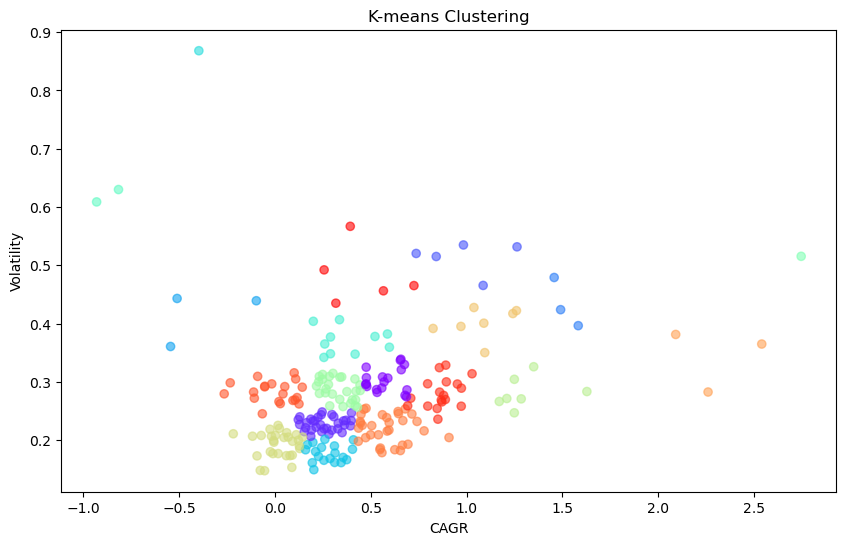

In [30]:
# Visualize the clusters with share names
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['CAGR'], df['Volatility'], c=df['Cluster'], cmap='rainbow', alpha=0.6)
    
plt.xlabel('CAGR')
plt.ylabel('Volatility')
plt.title('K-means Clustering')
plt.show()

In [31]:
# Calculate the WCSS (within-cluster sum of squares)
wcss = kmeans.inertia_

# Print the WCSS
print("Within-Cluster Sum of Squares (WCSS):", wcss)

Within-Cluster Sum of Squares (WCSS): 24.49995699164494


In [35]:
# Create a list to store WCSS values for different values of k
wcss_values = []

# Specify the range of k values to consider
k_values = range(1, 20)  # You can adjust the range as needed

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(standardized_data)
    wcss_values.append(kmeans.inertia_)

C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Wind

C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Wind

In [36]:
wcss_values

[484.00000000000006,
 298.7379800906328,
 215.48558131178822,
 163.52319725676418,
 133.35085218867394,
 103.32685941214156,
 87.50433160842256,
 74.91285186558008,
 63.32623698365356,
 58.185584629273464,
 52.70157029450001,
 46.866668910734624,
 42.689985248852196,
 38.64134611102631,
 33.76010703595584,
 31.87390315021245,
 29.254519196192437,
 26.557308832921517,
 24.848300650750282]

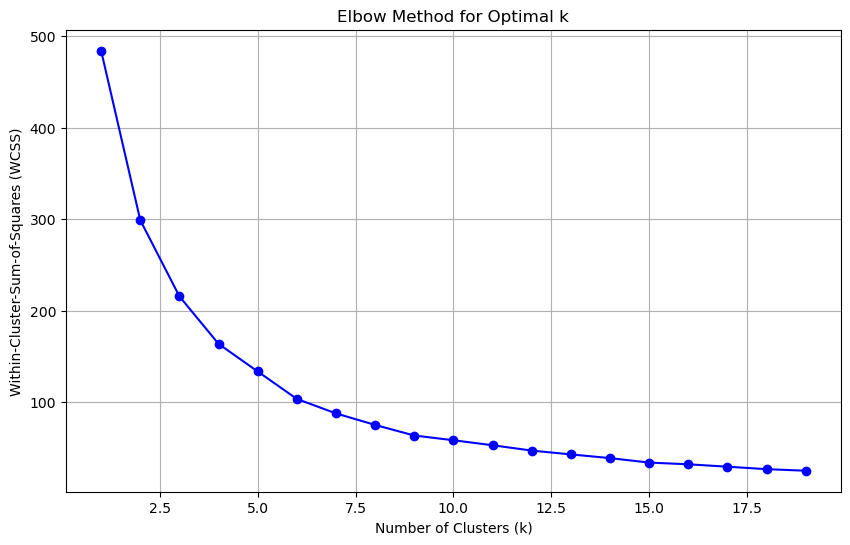

In [37]:
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.title('Elbow Method for Optimal k')

# Add gridlines
plt.grid(True)

# Show the chart
plt.show()

In [38]:
from sklearn.metrics import silhouette_score

In [40]:
silhouette_avg = silhouette_score(standardized_data, df['Cluster'] )
silhouette_avg

0.35942229853794144

In [ ]:
#Silhouette average is very low 